## Slice grappa with even and odd kernels 
###### Author: Zimu Huo
###### Date: 05.2022

See the figure 2 in [1]. Slice grappa with even and odd kernels is tailored to the SMS with EPI. One kernel used for even lines and one kernel used for odd lines. 

-------------------------------------------------------------------------
References

    [1] 
    Author:  Peter J Koopmans
    Title: Two-dimensional-NGC-SENSE-GRAPPA for fast, ghosting-robust reconstruction of in-plane and slice-accelerated blipped-CAIPI echo planar imaging
    Link: https://pubmed.ncbi.nlm.nih.gov/26932565/
    
    [2] 
    Author:  Setsompop K et al. 
    Title: Improving diffusion MRI using simultaneous multi-slice echo planar imaging
    Link: https://pubmed.ncbi.nlm.nih.gov/22732564/

In [1]:
import sys
sys.path.insert(1, '../')
import matplotlib.pyplot as plt
import numpy as np
from scipy import io
import util.simulator as simulate
from util.coil import *
from util.fft import *
import util.mask as undersample
from util.spsg2k import *
import math

In [2]:
numSlice = 4
R = 4
slice1 = np.load("../lib/slice1_grappa1.npy")
slice2 = np.load("../lib/slice2_grappa1.npy")
slice3 = np.load("../lib/slice3_grappa1.npy")
slice4 = np.load("../lib/slice4_grappa1.npy")
data = np.concatenate((slice1[...,None], slice2[...,None], slice3[...,None], slice4[...,None]), -1)[...,:numSlice]
data = data[...,:numSlice]
rawImage = ifft2c(data)
fovHeight, fovWidth, numCoil, _ = rawImage.shape

In [3]:
rawData = np.zeros(rawImage.shape, dtype = complex)
for sli in range (numSlice):
    rawData[:,:,:,sli] = fft2c(rawImage[:,:,:,sli])

In [4]:
cycle = np.arange(0,1,1/numSlice) * 2* np.pi
numAccq = int(numSlice*fovHeight/R)

In [5]:
shift = cycle*numAccq/(2*np.pi)
dataR = fft2c(simulate.multiSliceCAIPI(rawImage, cycle, R))

In [6]:
ncx = 32
ncy = 32
acsshift = cycle*int(numSlice* ncy/R)/(2*np.pi)
acsK = simulate.acs(rawData, (ncy, ncx))
acsIm = ifft2c(acsK)
calib = fft2c(simulate.singleSliceFov(acsIm,acsshift))

In [7]:
recon = spsg2k(dataR, calib, kh = 3, kw = 3)

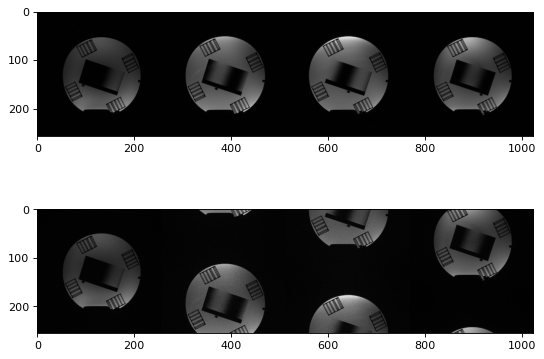

In [8]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(211)
plt.imshow(np.abs(stitch(rsos(rawImage), 1)), cmap = "gray")
plt.subplot(212)
plt.imshow(np.abs(stitch(rsos(ifft2c(recon)),1)), cmap = "gray")

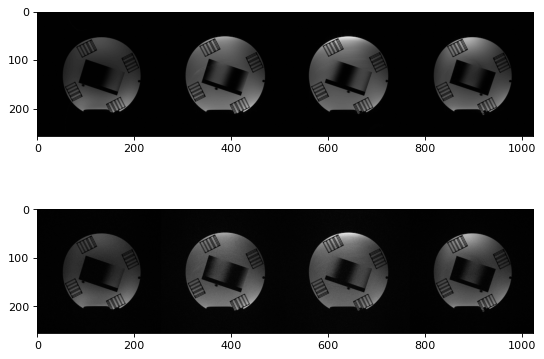

In [9]:
reconshift = cycle*int(numSlice* fovHeight/R)/(2*np.pi) 
recon1 = simulate.singleSliceFov(ifft2c(recon), - reconshift)
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(211)
plt.imshow(np.abs(stitch(rsos(rawImage), 1)), cmap = "gray")
plt.subplot(212)
plt.imshow(np.abs(stitch(rsos((recon1)),1)), cmap = "gray")